<a href="https://colab.research.google.com/github/Sujal3141/Credit-Card-Fraud-Detection/blob/main/Fraud_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder

Reading the dataset

In [7]:
df = pd.read_csv("/content/drive/MyDrive/colab /CreditCardData (1).csv")

In [8]:
df.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [9]:
df.shape

(100000, 16)

Checking for NULL Values in the dataset

In [10]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Day of Week,0
Time,0
Type of Card,0
Entry Mode,0
Amount,6
Type of Transaction,0
Merchant Group,10
Country of Transaction,0


Checking if the data is imbalance or not

In [11]:

df["Fraud"].value_counts()
# Majoriity of the cases are non fraud so the dataset is imbalance

,count
Fraud,
0,92805
1,7195


Dropping the unncessary column

In [12]:
df.drop(["Transaction ID"],axis=1,inplace =True)

In [13]:
df

,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,13-Oct-20,Tuesday,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,14-Oct-20,Wednesday,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,13-Oct-20,Tuesday,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,14-Oct-20,Wednesday,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


In [14]:
df.isnull().sum()

,0
Date,0
Day of Week,0
Time,0
Type of Card,0
Entry Mode,0
Amount,6
Type of Transaction,0
Merchant Group,10
Country of Transaction,0
Shipping Address,5


Dropping rows with Null values

In [15]:
df.dropna(axis=0,inplace=True)

In [16]:
df.isnull().sum()

,0
Date,0
Day of Week,0
Time,0
Type of Card,0
Entry Mode,0
Amount,0
Type of Transaction,0
Merchant Group,0
Country of Transaction,0
Shipping Address,0


Checking for values in each categorical column

In [17]:
set(df["Type of Card"].values)

{'MasterCard', 'Visa'}

In [18]:
set(df["Entry Mode"].values)

{'CVC', 'PIN', 'Tap'}

In [19]:
set(df["Type of Transaction"].values)

{'ATM', 'Online', 'POS'}

In [20]:
set(df["Merchant Group"].values)

{'Children',
 'Electronics',
 'Entertainment',
 'Fashion',
 'Food',
 'Gaming',
 'Products',
 'Restaurant',
 'Services',
 'Subscription'}

In [21]:
set(df["Day of Week"].values)

{'Friday', 'Thursday', 'Tuesday', 'Wednesday'}

In [22]:
set(df["Country of Residence"].values)

{'China', 'India', 'Russia', 'USA', 'United Kingdom'}

In [23]:
set(df["Shipping Address"].values)

{'China', 'India', 'Russia', 'USA', 'United Kingdom'}

In [24]:
set(df["Country of Transaction"].values)

{'China', 'India', 'Russia', 'USA', 'United Kingdom'}

In [25]:
# Ohe = OneHotEncoder()

In [26]:
# Ohe.fit_transform(df[["Type of Card","Entry Mode","Merchant Group","Day of Week","Country of Transaction","Shipping Address","Country of Residence","Gender","Bank"]])

Converting categorical columns to numerical


In [27]:
col = ["Type of Card","Type of Transaction","Entry Mode","Merchant Group","Day of Week","Country of Transaction","Shipping Address","Country of Residence","Gender","Bank"]
df = pd.get_dummies(df,columns=col)

In [28]:
df

,Date,Time,Amount,Age,Fraud,Type of Card_MasterCard,Type of Card_Visa,Type of Transaction_ATM,Type of Transaction_Online,Type of Transaction_POS,...,Gender_F,Gender_M,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
0,14-Oct-20,19,£5,25.2,0,False,True,False,False,True,...,False,True,False,False,False,False,False,False,False,True
1,14-Oct-20,17,£288,49.6,0,True,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
2,14-Oct-20,14,£5,42.2,0,False,True,False,False,True,...,True,False,True,False,False,False,False,False,False,False
3,13-Oct-20,14,£28,51.0,0,False,True,False,False,True,...,True,False,True,False,False,False,False,False,False,False
4,13-Oct-20,23,£91,38.0,1,False,True,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,13-Oct-20,22,£15,53.8,0,True,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
99996,14-Oct-20,23,£7,45.0,0,True,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
99997,13-Oct-20,11,£21,46.5,0,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
99998,14-Oct-20,22,£25,48.2,0,False,True,False,False,True,...,False,True,True,False,False,False,False,False,False,False


Converting date column to datetime datatype

In [29]:
df["Date"] = pd.to_datetime(df["Date"])

<ipython-input-29-cc2372053ca6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [30]:
df.dtypes

,0
Date,datetime64[ns]
Time,int64
Amount,object
Age,float64
Fraud,int64
Type of Card_MasterCard,bool
Type of Card_Visa,bool
Type of Transaction_ATM,bool
Type of Transaction_Online,bool
Type of Transaction_POS,bool


Applying feature extraction on Date column

In [31]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [32]:
df.drop(["Date"],axis=1,inplace=True)

In [33]:
df

,Time,Amount,Age,Fraud,Type of Card_MasterCard,Type of Card_Visa,Type of Transaction_ATM,Type of Transaction_Online,Type of Transaction_POS,Entry Mode_CVC,...,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS,Year,Month,Day
0,19,£5,25.2,0,False,True,False,False,True,False,...,False,False,False,False,False,False,True,2020,10,14
1,17,£288,49.6,0,True,False,False,False,True,False,...,False,False,False,True,False,False,False,2020,10,14
2,14,£5,42.2,0,False,True,False,False,True,False,...,False,False,False,False,False,False,False,2020,10,14
3,14,£28,51.0,0,False,True,False,False,True,False,...,False,False,False,False,False,False,False,2020,10,13
4,23,£91,38.0,1,False,True,False,True,False,True,...,False,False,True,False,False,False,False,2020,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22,£15,53.8,0,True,False,False,False,True,False,...,False,False,True,False,False,False,False,2020,10,13
99996,23,£7,45.0,0,True,False,True,False,False,False,...,False,False,False,False,False,False,False,2020,10,14
99997,11,£21,46.5,0,True,False,True,False,False,False,...,False,True,False,False,False,False,False,2020,10,13
99998,22,£25,48.2,0,False,True,False,False,True,False,...,False,False,False,False,False,False,False,2020,10,14


Converting amount column to numerical

In [34]:

df["Amount"] = df["Amount"].str.replace("£","")

In [35]:
df["Amount"]=df["Amount"].astype(int)

In [36]:
df

,Time,Amount,Age,Fraud,Type of Card_MasterCard,Type of Card_Visa,Type of Transaction_ATM,Type of Transaction_Online,Type of Transaction_POS,Entry Mode_CVC,...,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS,Year,Month,Day
0,19,5,25.2,0,False,True,False,False,True,False,...,False,False,False,False,False,False,True,2020,10,14
1,17,288,49.6,0,True,False,False,False,True,False,...,False,False,False,True,False,False,False,2020,10,14
2,14,5,42.2,0,False,True,False,False,True,False,...,False,False,False,False,False,False,False,2020,10,14
3,14,28,51.0,0,False,True,False,False,True,False,...,False,False,False,False,False,False,False,2020,10,13
4,23,91,38.0,1,False,True,False,True,False,True,...,False,False,True,False,False,False,False,2020,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22,15,53.8,0,True,False,False,False,True,False,...,False,False,True,False,False,False,False,2020,10,13
99996,23,7,45.0,0,True,False,True,False,False,False,...,False,False,False,False,False,False,False,2020,10,14
99997,11,21,46.5,0,True,False,True,False,False,False,...,False,True,False,False,False,False,False,2020,10,13
99998,22,25,48.2,0,False,True,False,False,True,False,...,False,False,False,False,False,False,False,2020,10,14


Visualising dataset by correlation with target column

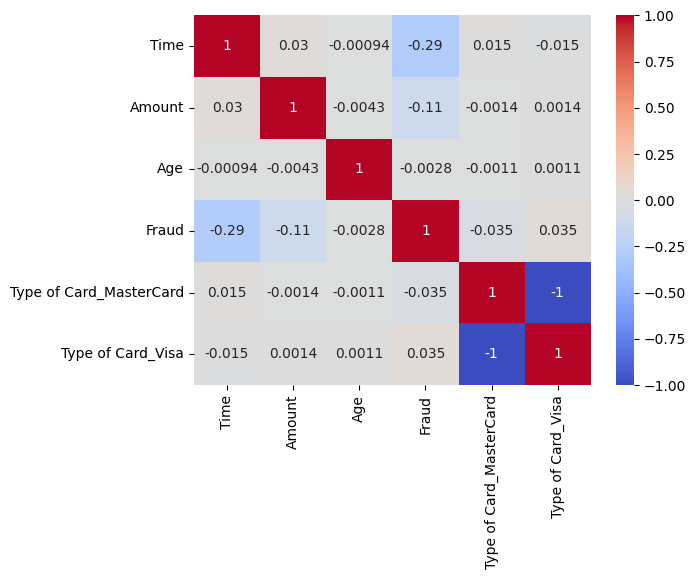

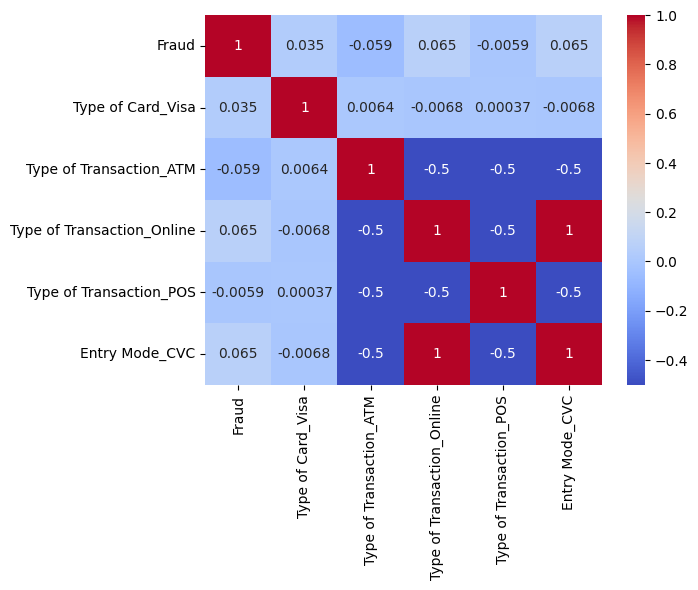

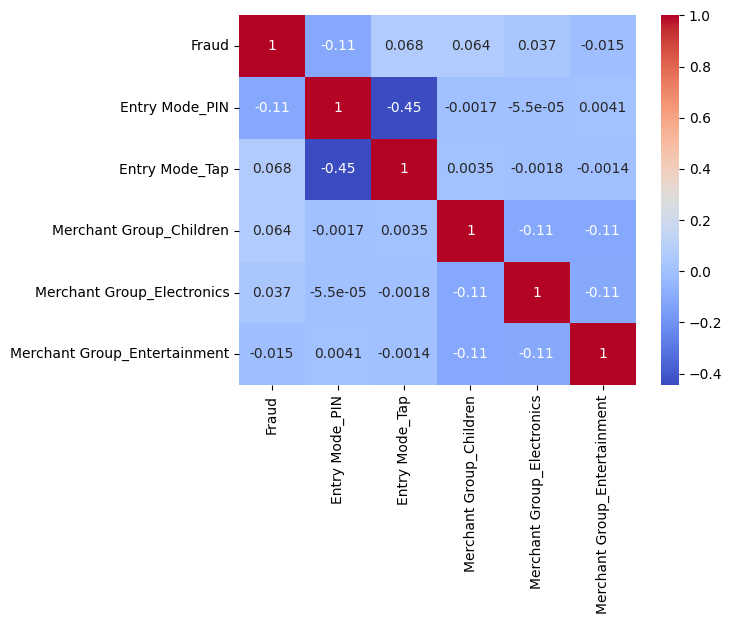

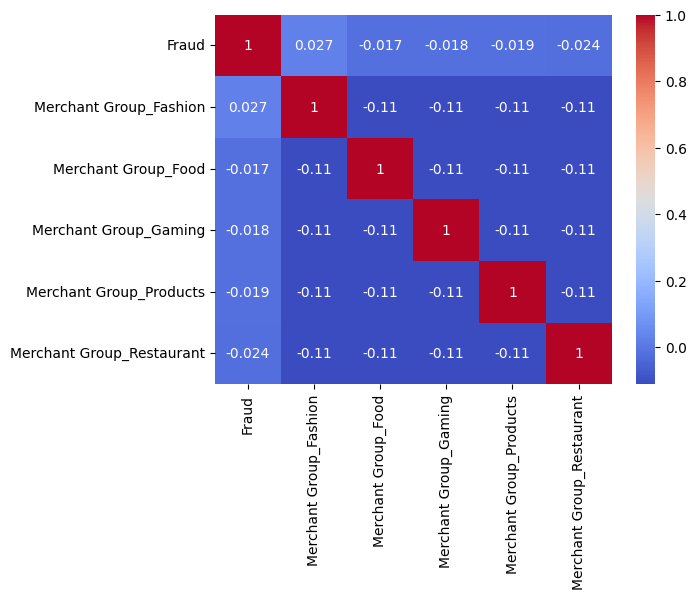

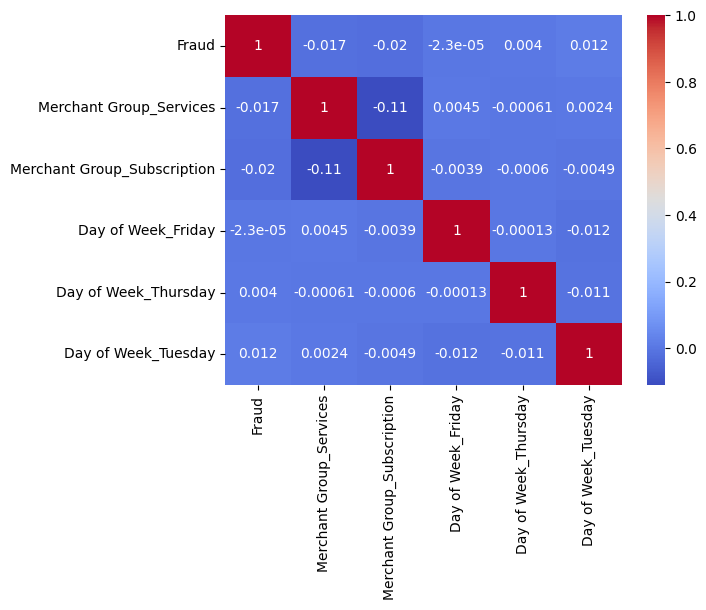

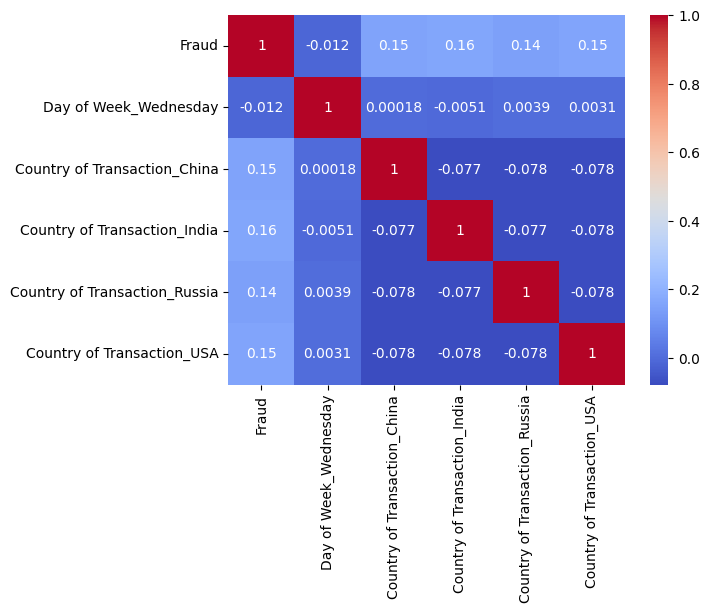

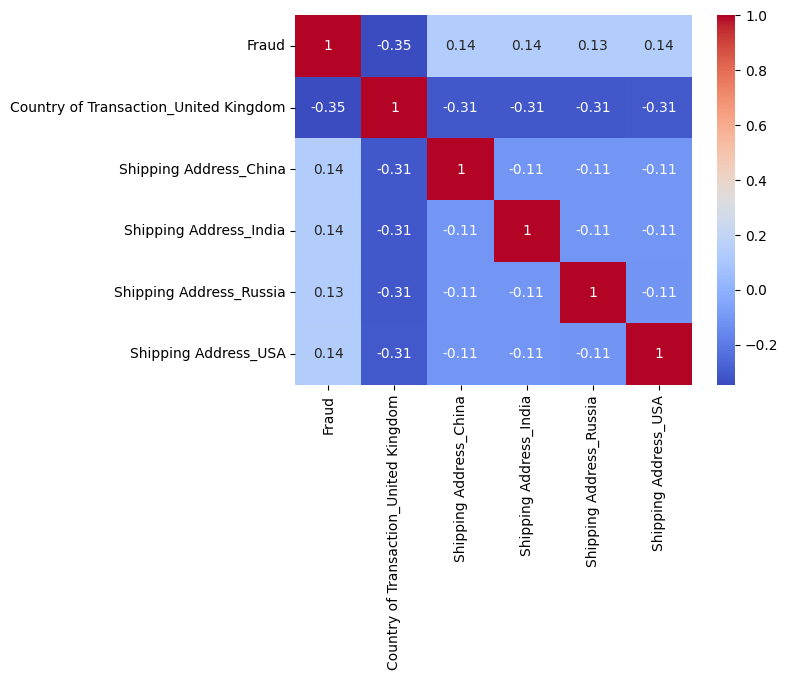

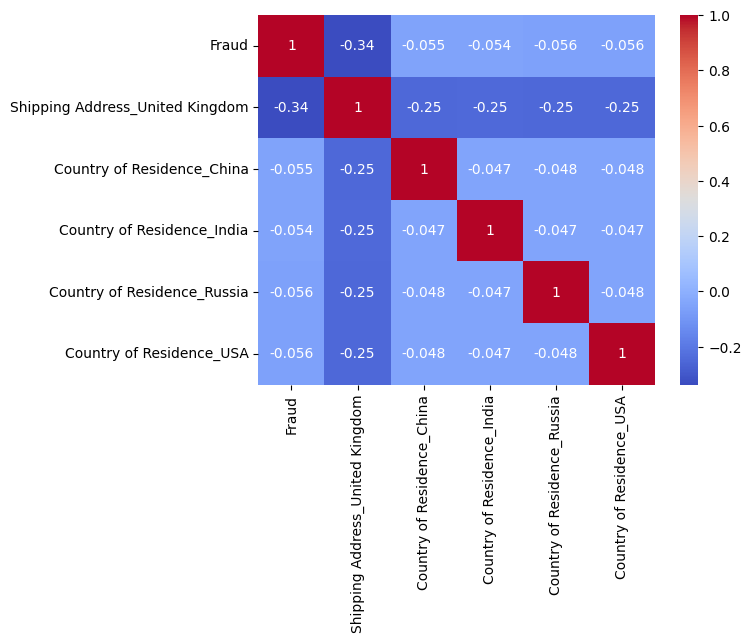

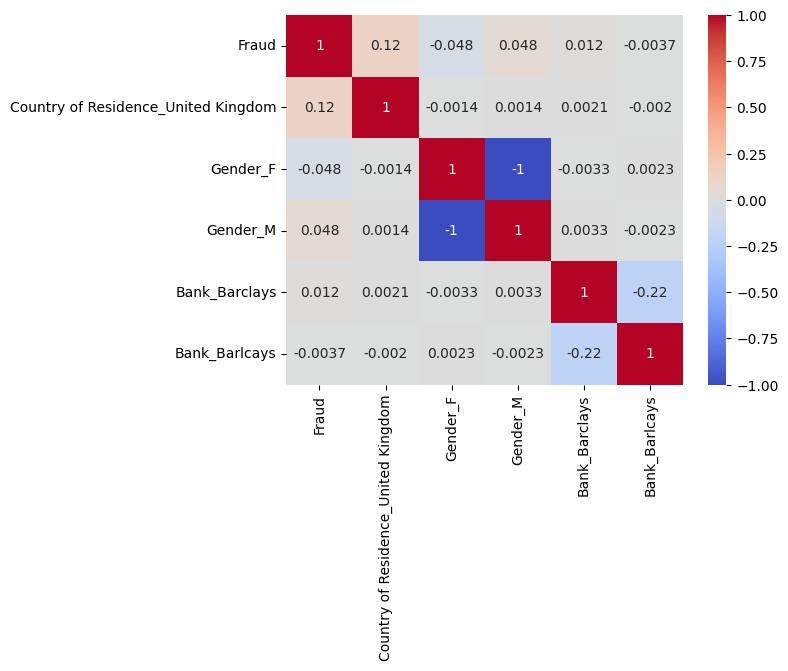

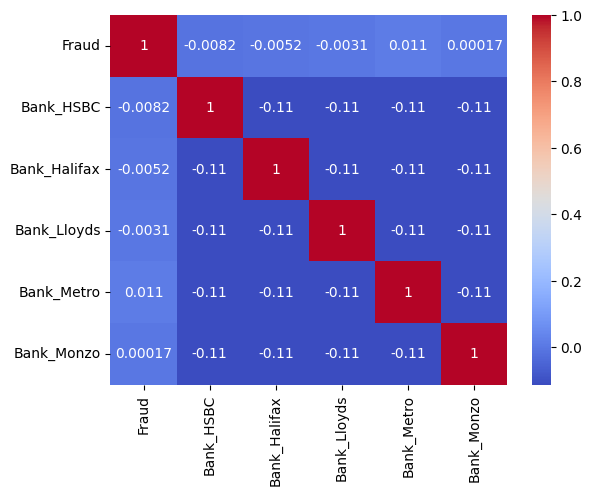

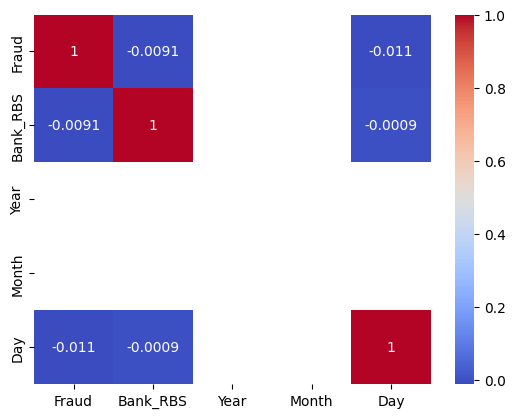

In [37]:
sns.heatmap(df.iloc[:,:6].corr(),annot = True,cmap='coolwarm')
plt.show()
for i in range(1,11):
  if 5*i+5 > df.shape[1]:
    cols = df.iloc[:,5*i:]
  else:
    cols = df.iloc[:,5*i:5*i+5]
  fraud_col = df.iloc[:,3]
  df_select = pd.concat([fraud_col,cols],axis=1)
  sns.heatmap(df_select.corr(),annot = True,cmap='coolwarm')
  plt.show()

In [38]:
df.shape

(99977, 54)

In [39]:
# df.drop(["Month","Year"],axis=1,inplace=True)

In [40]:
df.shape

(99977, 54)

Splitting the data into train and test

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,x_test,y_train,y_test = train_test_split(df.drop(["Fraud"],axis=1),df["Fraud"],test_size=0.3,random_state=42)

Applying Smote for imbalance dataset

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smote = SMOTE()

In [45]:
x_resampled , y_resampled = smote.fit_resample(X_train,y_train)

Using xgboost for training the model

In [46]:
from xgboost import XGBClassifier
# model = XGBClassifier(enable_categorical=True)

In [47]:
# model.fit(X_train, y_train)


In [48]:
from sklearn.metrics import roc_auc_score, f1_score


In [49]:
X_train.dtypes

,0
Time,int64
Amount,int64
Age,float64
Type of Card_MasterCard,bool
Type of Card_Visa,bool
Type of Transaction_ATM,bool
Type of Transaction_Online,bool
Type of Transaction_POS,bool
Entry Mode_CVC,bool
Entry Mode_PIN,bool


In [50]:
xgb = XGBClassifier(n_estimators=10, early_stopping_rounds=5)
model = xgb.fit(x_resampled, y_resampled, eval_set=[(x_test, y_test)], verbose=True)

[0]	validation_0-logloss:0.47466
[1]	validation_0-logloss:0.35520
[2]	validation_0-logloss:0.27902
[3]	validation_0-logloss:0.22658
[4]	validation_0-logloss:0.18913
[5]	validation_0-logloss:0.16062
[6]	validation_0-logloss:0.14000
[7]	validation_0-logloss:0.12289
[8]	validation_0-logloss:0.10894
[9]	validation_0-logloss:0.09796


In [51]:
y_pred = model.predict(x_test)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [52]:
# print(f"auc : {auc}")
# print(f"f1 : {f1}")

Callculatinng accuracy of the model using recall_score

In [53]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [54]:
rs = recall_score(y_test,y_pred)

In [55]:
print(rs)

0.9070087036188731
